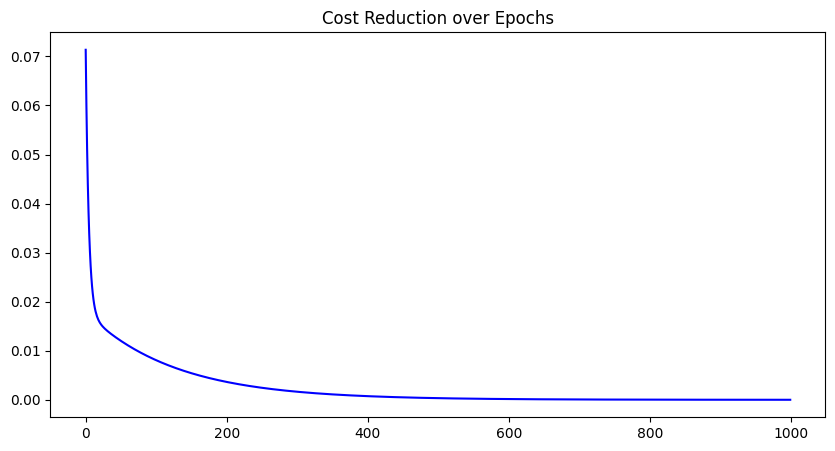

--- PART B OUTPUT (USE THESE IN PART D) ---
R-Squared: 0.971603
RMSE (Dollars): 3.8948


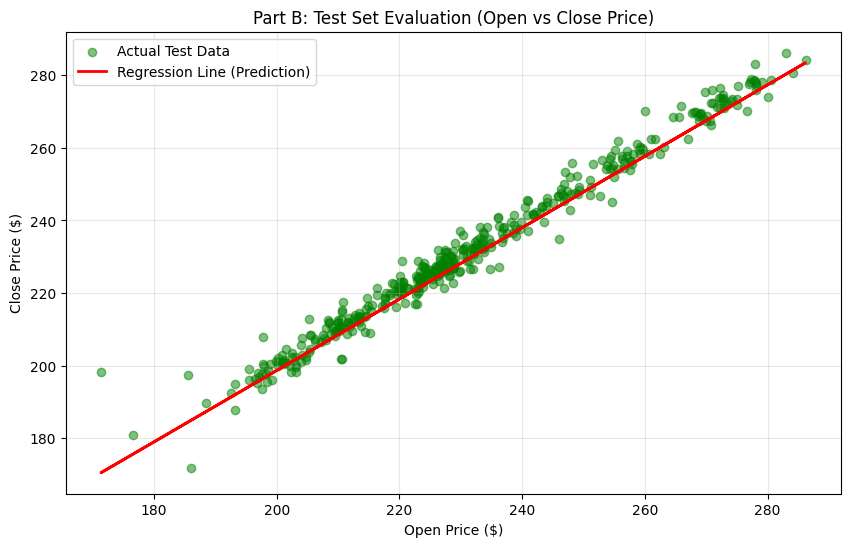

Visualized 408 test samples.


In [ ]:

# PART B - SIMPLE LINEAR REGRESSION (GRADIENT DESCENT)

import pandas as pd
import matplotlib.pyplot as plt

# 1. LOAD DATA & NORMALIZE
df_raw = pd.read_csv('stock_market_data.csv', header=[0,1])
data = pd.DataFrame()
data['x'] = df_raw['Open']['AAPL']
data['y'] = df_raw['Close']['AAPL']
data = data.dropna()

x_min, x_max = data['x'].min(), data['x'].max()
y_min, y_max = data['y'].min(), data['y'].max()

X_norm = (data['x'].values - x_min) / (x_max - x_min)
y_norm = (data['y'].values - y_min) / (y_max - y_min)

# 2. TRAIN-TEST SPLIT (80% - 20%)
split = int(len(X_norm) * 0.8)
X_train, X_test = X_norm[:split], X_norm[split:]
y_train, y_test = y_norm[:split], y_norm[split:]

# 3. GRADIENT DESCENT ALGORITHM
m, c = 0.0, 0.0
alpha, epochs = 0.1, 1000
n = len(X_train)
cost_history = []

for i in range(epochs):
    y_pred = m * X_train + c
    error = y_pred - y_train
    cost = (1/(2*n)) * np.sum(error**2)
    cost_history.append(cost)
    dm = (1/n) * np.sum(error * X_train)
    dc = (1/n) * np.sum(error)
    m, c = m - alpha * dm, c - alpha * dc

# 4. VISUALIZATION
plt.figure(figsize=(10, 5))
plt.plot(range(epochs), cost_history, color='blue')
plt.title('Cost Reduction over Epochs')
plt.show()

# 5. INVERSE TRANSFORM FOR EVALUATION
y_pred_scaled = m * X_test + c
X_test_real = X_test * (x_max - x_min) + x_min
y_test_real = y_test * (y_max - y_min) + y_min
y_pred_real = y_pred_scaled * (y_max - y_min) + y_min

# PART B EVALUATION (DOLLAR CONVERSION)
# Predict on Test Set (Scaled)
y_pred_scaled = m * X_test + c

# Inverse Transform (Convert 0-1 back to Dollars)
y_test_dollars = y_test * (y_max - y_min) + y_min
y_pred_dollars = y_pred_scaled * (y_max - y_min) + y_min

# Metrics Calculation
mse_b = np.mean((y_test_dollars - y_pred_dollars)**2)
rmse_b = np.sqrt(mse_b)

# R-Squared
ss_res = np.sum((y_test_dollars - y_pred_dollars)**2)
ss_tot = np.sum((y_test_dollars - np.mean(y_test_dollars))**2)
r2_b = 1 - (ss_res / ss_tot)

print(f"--- PART B OUTPUT ---")
print(f"R-Squared: {r2_b:.6f}")
print(f"RMSE (Dollars): {rmse_b:.4f}")


# VISUALIZATION: TEST SET RESULTS (ORIGINAL SCALE)


# 1. Predict on the Test Set (in scaled units)
y_pred_scaled = m * X_test + c

# 2. Inverse Transform: Convert back from [0,1] to actual Dollars
# Formula: Original = (Scaled * Range) + Min
X_test_dollars = X_test * (x_max - x_min) + x_min
y_test_dollars = y_test * (y_max - y_min) + y_min
y_pred_dollars = y_pred_scaled * (y_max - y_min) + y_min

# 3. Create the Plot
plt.figure(figsize=(10, 6))

# Plot the actual test data points
plt.scatter(X_test_dollars, y_test_dollars, color='green', alpha=0.5, label='Actual Test Data')

# Plot the regression line
# Note: We use the same X values but plot against our predictions
plt.plot(X_test_dollars, y_pred_dollars, color='red', linewidth=2, label='Regression Line (Prediction)')

plt.title('Part B: Test Set Evaluation (Open vs Close Price)')
plt.xlabel('Open Price ($)')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Visualized {len(X_test)} test samples.")